In [1]:
import sys
sys.path.append('/home/hamid/Downloads/EnsembleTools/')

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, cm
from dpet.featurization.distances import calc_ca_dmap
from dpet.analysis import EnsembleAnalysis , FeaturizationOutput
from dpet.visualization.plot import *
from dpet.featurization.angles import *
from dpet.featurization.distances import *
from dpet.logger import stream as st

In [3]:
# Codes.
ens_codes = [
    # "PED00001e001_renumbered",
    # "PED00001e002_renumbered",
    # "PED00001e003_renumbered",
    # "PED00014e002_chain_A",
    "PED00023e001_renumbered",
    "PED00023e002_renumbered",
    "PED00023e003_renumbered",
    "PED00159e002_renumbered",
    "PED00160e002_renumbered"
]

# Instantiate the pipeline object.
pipeline = EnsembleAnalysis()

# Load some data.
data_dp = "/home/hamid/PED_Data_analysis/phos_analysis/PDBs/non_phos/"
pipeline.load_ensembles(
    input_dp=data_dp,
    codes=ens_codes,
    format="pdb_dir",
    topology_fp= None,  # Not needed when format="pdb".
    ext=None
)

st.write("Loaded ensembles with the following codes:", pipeline.codes)

Loading data for PED00023e001_renumbered.
# Loading /home/hamid/PED_Data_analysis/phos_analysis/PDBs/non_phos/PED00023e001_renumbered.dcd.
Found 16 conformations.
Loading data for PED00023e002_renumbered.
# Loading /home/hamid/PED_Data_analysis/phos_analysis/PDBs/non_phos/PED00023e002_renumbered.dcd.
Found 13 conformations.
Loading data for PED00023e003_renumbered.
# Loading /home/hamid/PED_Data_analysis/phos_analysis/PDBs/non_phos/PED00023e003_renumbered.dcd.
Found 15 conformations.
Loading data for PED00159e002_renumbered.
# Loading /home/hamid/PED_Data_analysis/phos_analysis/PDBs/non_phos/PED00159e002_renumbered.dcd.
Found 500 conformations.
Loading data for PED00160e002_renumbered.
# Loading /home/hamid/PED_Data_analysis/phos_analysis/PDBs/non_phos/PED00160e002_renumbered.dcd.
Found 500 conformations.
Loaded ensembles with the following codes: ['PED00023e001_renumbered', 'PED00023e002_renumbered', 'PED00023e003_renumbered', 'PED00159e002_renumbered', 'PED00160e002_renumbered']


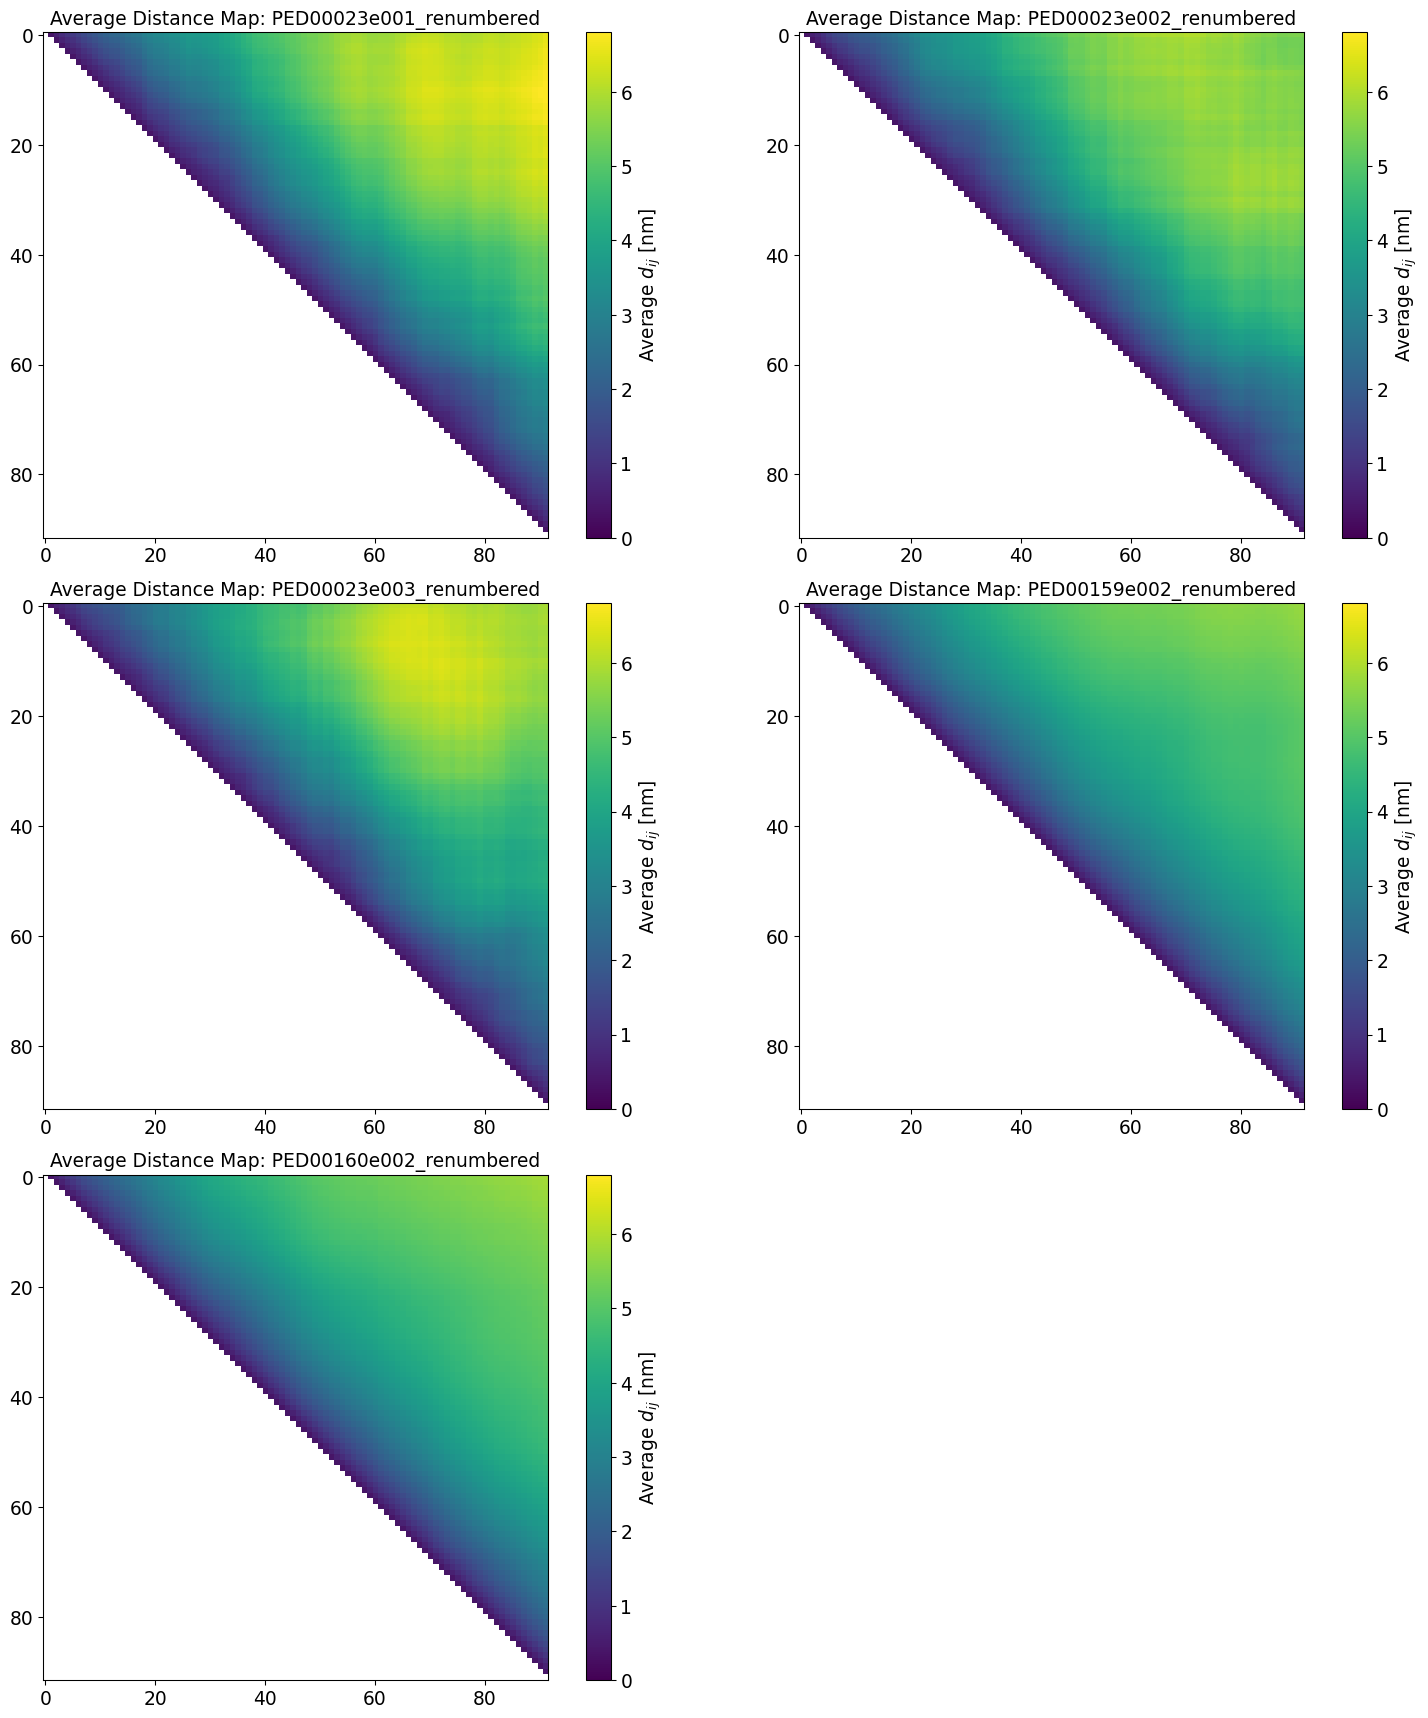

In [4]:
plot_average_dmap(pipeline)

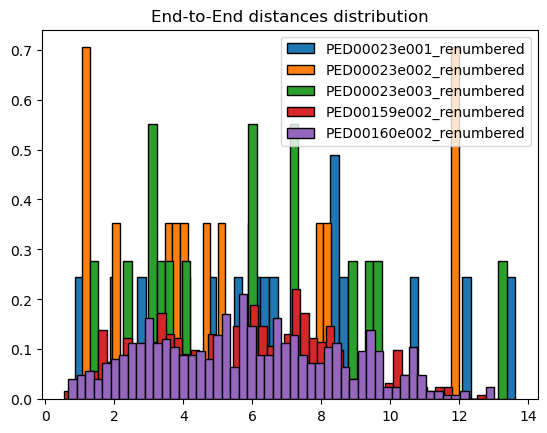

In [5]:
end_to_end_distances_plot(pipeline, bins=50)

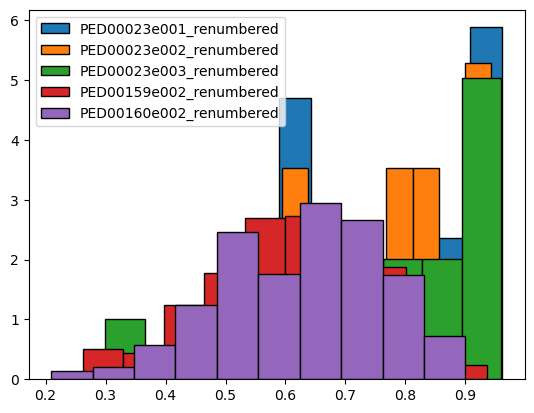

In [ ]:
plot_asphericity_dist(pipeline, bins=10)

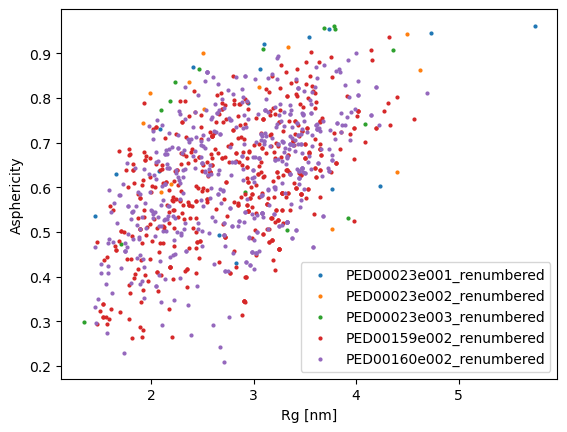

In [ ]:
plot_rg_vs_asphericity(pipeline)

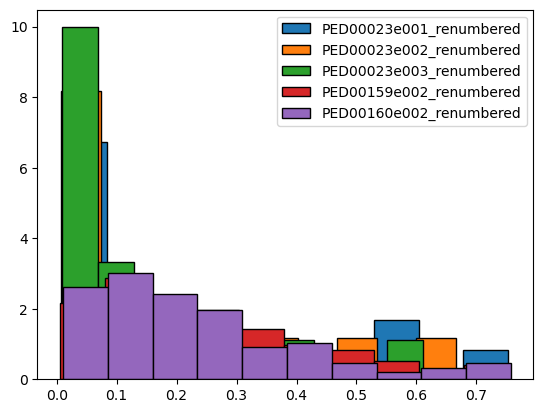

In [ ]:
plot_prolateness_dist(pipeline, bins=10)

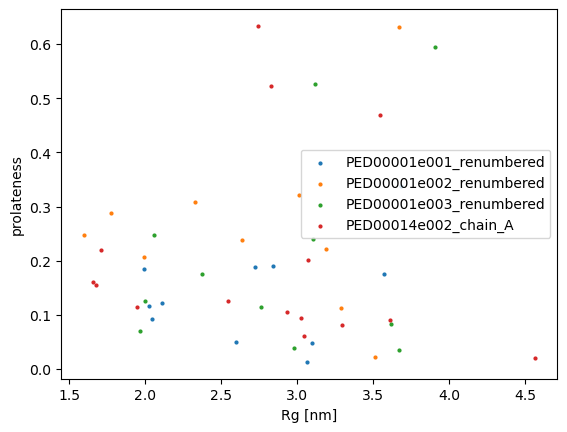

In [ ]:
plot_rg_vs_prolateness(pipeline)

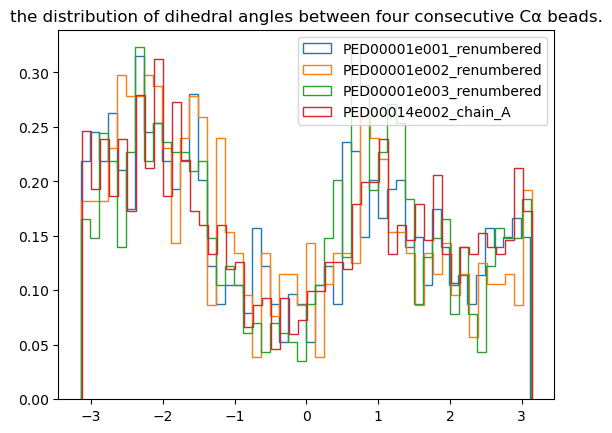

In [ ]:
plot_alpha_angles_dist(pipeline)

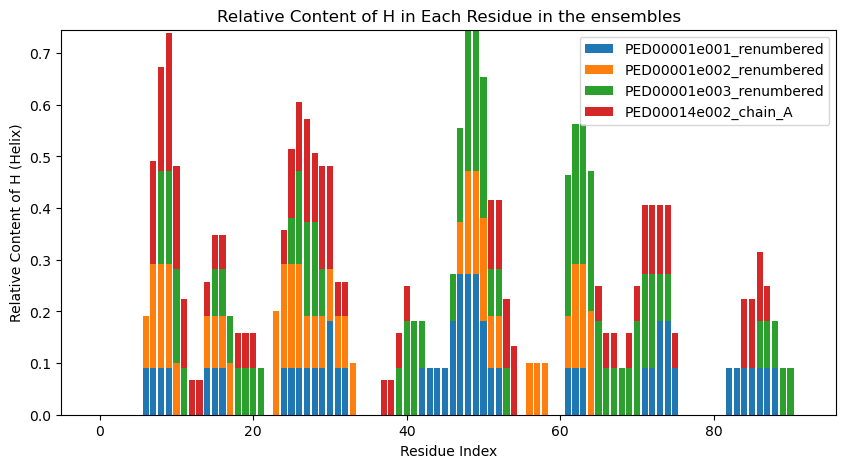

In [ ]:
plot_relative_helix_content(pipeline)

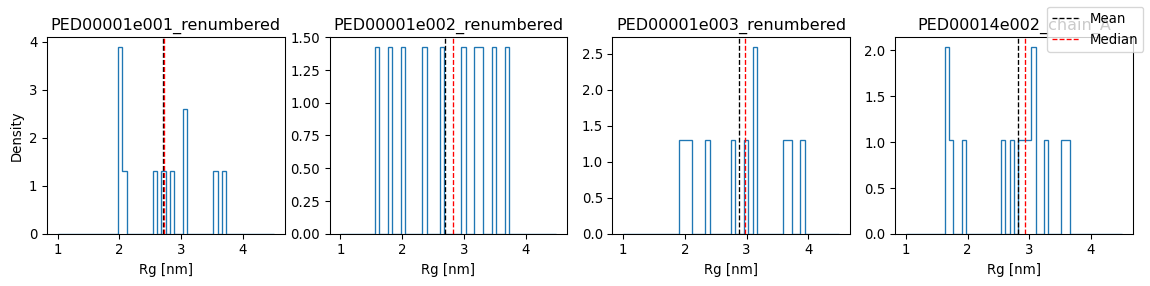

In [ ]:
plot_rg_comparison(pipeline)

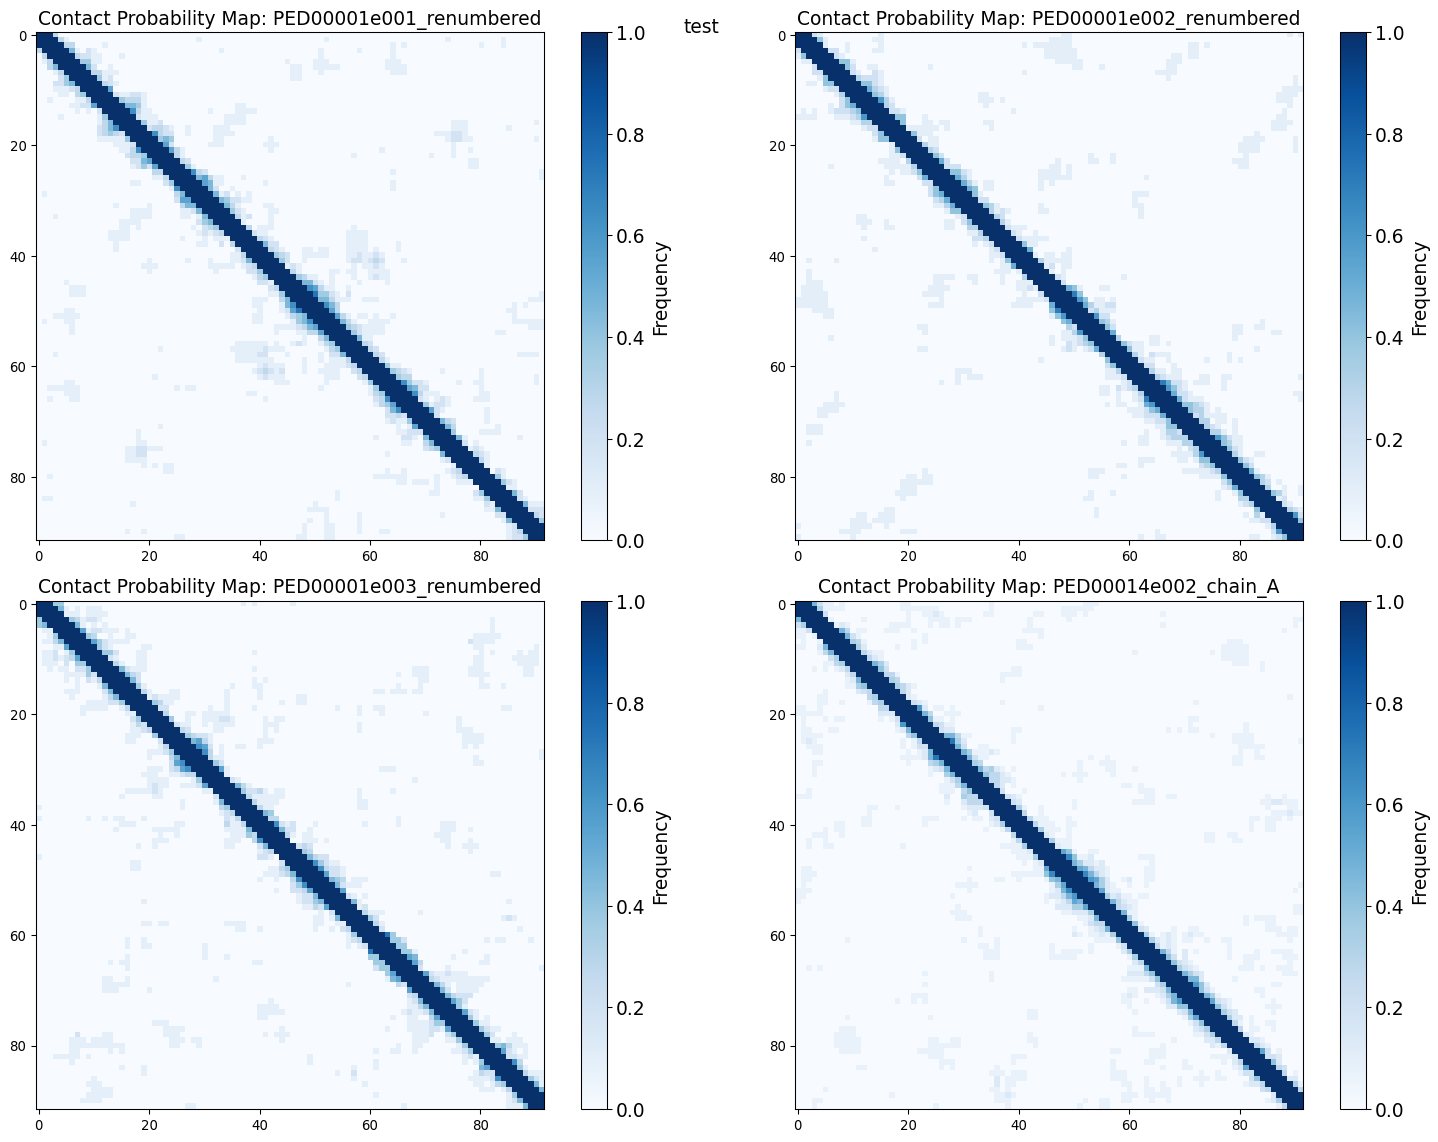

In [ ]:
plot_contact_prob(pipeline, title="test", threshold=0.8)

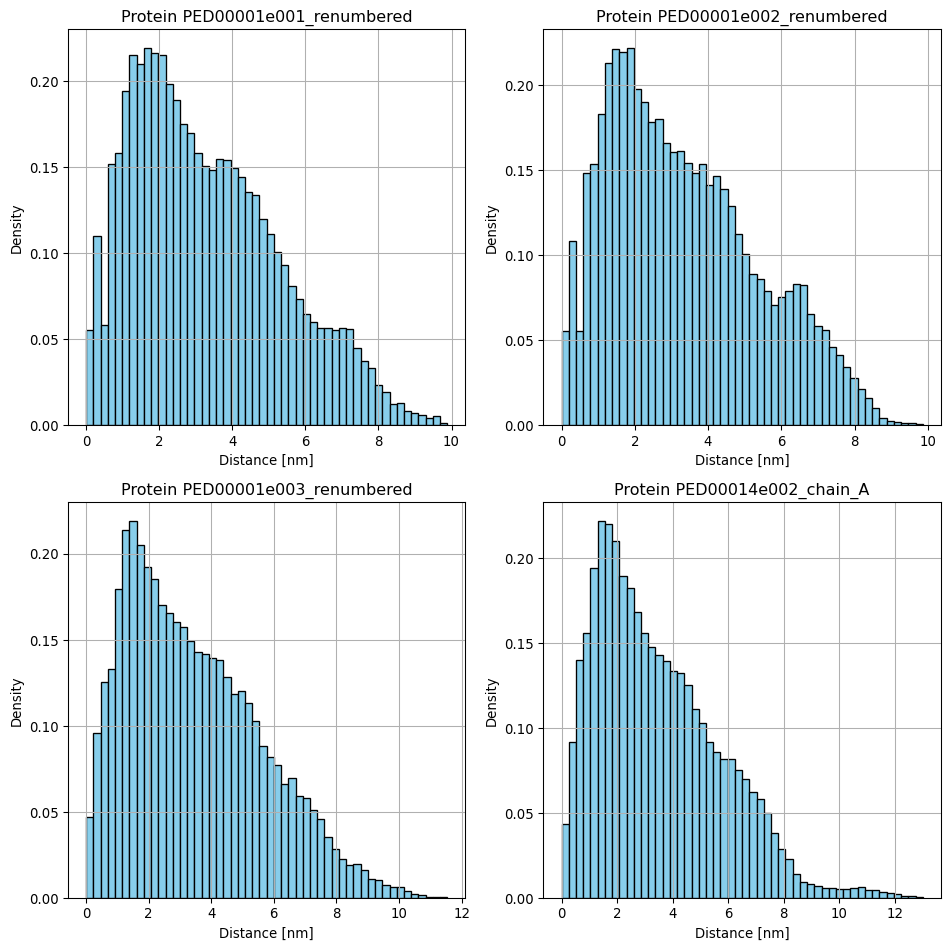

In [ ]:
plot_distance_distribution(pipeline)

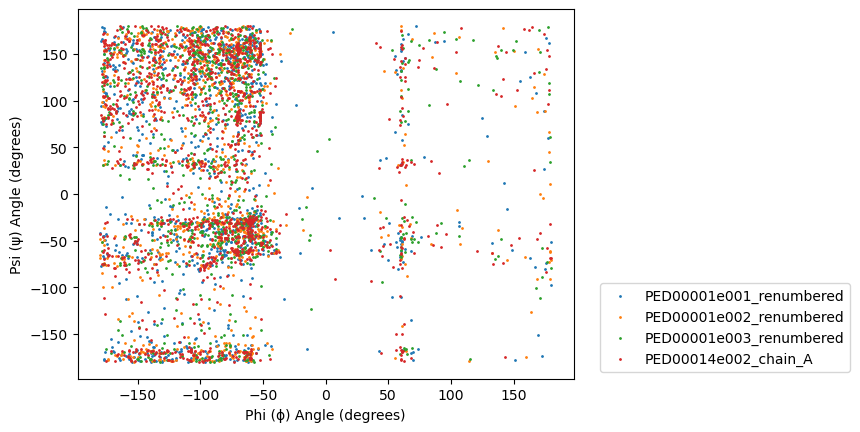

In [ ]:
plot_ramachandran_plot(pipeline)

In [64]:
mdtraj.compute_phi(pipeline.trajectories["3a1g_B_prod_R1_fit"])[1].shape

KeyError: '3a1g_B_prod_R1_fit'

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming phi and psi are your matrices
phi = mdtraj.compute_phi(pipeline.trajectories["3a1g_B_prod_R1_fit"])[1]
psi = mdtraj.compute_psi(pipeline.trajectories["3a1g_B_prod_R1_fit"])[1]

# Flatten the matrices
phi_flat = phi.flatten()
psi_flat = psi.flatten()

# Calculate frequencies
unique_pairs, counts = np.unique((phi_flat, psi_flat), axis=1, return_counts=True)

# Plot Ramachandran plot
plt.figure(figsize=(8, 6))
plt.scatter(phi_flat, psi_flat, c=counts, cmap='viridis', alpha=0.6)
plt.colorbar(label='Frequency')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.title('Ramachandran Plot with Frequency Color Bar')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid(True)
plt.show()


KeyError: '3a1g_B_prod_R1_fit'

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Assuming you have phi and psi angles in arrays/Lists
phi_angles = mdtraj.compute_phi(pipeline.trajectories["3a1g_B_prod_R1_fit"])[1] # List of phi angles
psi_angles = mdtraj.compute_psi(pipeline.trajectories["3a1g_B_prod_R1_fit"])[1] 
 # List of psi angles
total_points = len(phi_angles)
# Create a scatter plot with color bar
plt.figure(figsize=(8, 6))
plt.hexbin(phi_angles, psi_angles, gridsize=50 ,cmap='viridis',norm =mpl.colors.Normalize(vmin=0, vmax=600) ,mincnt=1)
plt.colorbar(label='Frequency')  # Add color bar indicating frequency
plt.xlabel('Phi (°)')
plt.ylabel('Psi (°)')
plt.title('Ramachandran Plot')
plt.grid(True)
plt.show()


KeyError: '3a1g_B_prod_R1_fit'

In [67]:
phi_angles = mdtraj.compute_phi(pipeline.trajectories["3a1g_B_prod_R1_fit"])[1] # List of phi angles
psi_angles = mdtraj.compute_psi(pipeline.trajectories["3a1g_B_prod_R1_fit"])[1] 
plt.figure(figsize=(8, 6))
hb = plt.hexbin(phi_angles, psi_angles, gridsize=50, cmap='viridis', mincnt=1)

# Calculate total number of data points
total_points = len(phi_angles)

# Normalize the colors by the total number of data points
plt.colorbar(hb, label='Relative Frequency', format='%.2f', ticks=np.linspace(0, hb.get_array().max(), 6)/total_points)

plt.xlabel('Phi (°)')
plt.ylabel('Psi (°)')
plt.title('Ramachandran Plot')
plt.grid(True)
plt.show()

KeyError: '3a1g_B_prod_R1_fit'